Introduction:

Road traffic accidents are a significant public safety concern worldwide. Understanding the factors that influence accident severity is crucial for developing effective preventive measures and improving road safety. This EDA aims to provide a comprehensive overview of the dataset and identify key patterns and trends.


Data Description:
The dataset used for this analysis consists of two main tables: "Accidents" and "Vehicles." The "Accidents" table contains information about individual accidents, including attributes such as accident severity, location, time, and weather conditions. The "Vehicles" table contains details about the vehicles involved in these accidents.



In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import folium

Accidents

In [2]:
accidents = pd.read_csv("/kaggle/input/accident-vehicle-information/Accident_Information.csv",low_memory=False)
accidents.head(10) 

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No
5,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-11,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,NaN,2005-01-13,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,20:40,Urban,Fine no high winds,2005,No
7,200501BS00009,A,315.0,NaN,0.0,Slight,NaN,2005-01-14,Friday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:35,Urban,Fine no high winds,2005,No
8,200501BS00010,A,3212.0,B,304.0,Slight,NaN,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,22:43,Urban,Fine no high winds,2005,No
9,200501BS00011,B,450.0,C,0.0,Slight,NaN,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,16:00,Urban,Fine no high winds,2005,No


In [3]:
accidents.shape
accidents.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

In [4]:
vehicles = pd.read_csv("/kaggle/input/accident-vehicle-information/Vehicle_Information.csv", encoding='ISO-8859-1')
vehicles.columns

Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway',
       'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre',
       'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive',
       'X1st_Point_of_Impact', 'Year'],
      dtype='object')

Data Preprcoessing :

The following data preprocessing steps were performed before conducting the analysis:

Handling Missing Data: Columns with excessive missing data were dropped from the dataset, and records with missing values were removed.

Datetime Format: The date column was converted from an object data type to a datetime data type for time-related analysis.

Feature Engineering: The "Hour" and "Daytime" columns were created to categorize accidents by time of day, allowing for better analysis.

In [5]:
# Check missing values and dealing with them
missing_values = accidents.isnull().sum()

# Print the columns with missing values
print("Columns with missing values (Pandas):")
print(missing_values[missing_values > 0])

Columns with missing values (Pandas):
1st_Road_Number                                      2
2nd_Road_Class                                  844272
2nd_Road_Number                                  17593
Carriageway_Hazards                            2007807
Did_Police_Officer_Attend_Scene_of_Accident        278
Latitude                                           174
Location_Easting_OSGR                              164
Location_Northing_OSGR                             164
Longitude                                          175
LSOA_of_Accident_Location                       144953
Pedestrian_Crossing-Human_Control                 2920
Pedestrian_Crossing-Physical_Facilities           3560
Special_Conditions_at_Site                     1995137
Speed_limit                                         37
Time                                               156
InScotland                                          53
dtype: int64


In [6]:
#dropping columns with too many missing values 
accidents = accidents.drop(columns=['2nd_Road_Class','2nd_Road_Number','Location_Easting_OSGR','Location_Northing_OSGR','LSOA_of_Accident_Location','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','InScotland'])

In [8]:
#dropping records with NA values
accidents = accidents.dropna()
accidents.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number',
       'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control',
       'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year'],
      dtype='object')

In [9]:
accidents.isna().sum()

Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Longitude                                      0
Number_of_Casualties                           0
Number_of_Vehicles                             0
Police_Force                                   0
Road_Surface_Conditions                        0
Road_Type                                      0
Special_Conditions_a

Datetime format change
date is in object form and not Datetime format so let's change that 

In [10]:
accidents['Date']=pd.to_datetime(accidents['Date'])
accidents.iloc[:,5:8].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5538 entries, 47 to 2046650
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Date                                         5538 non-null   datetime64[ns]
 1   Day_of_Week                                  5538 non-null   object        
 2   Did_Police_Officer_Attend_Scene_of_Accident  5538 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 173.1+ KB


In [11]:
#Separting time to have better analysis of the accidents data
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

#make hours into categories to analyze 

In [12]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [13]:
# create a little dictionary to later look up the groups I created
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

In [14]:
# apply this function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head()

,Time,Hour,Daytime
47,11:33,11,2
1198,15:16,15,3
1268,18:50,18,3
1289,16:34,16,3
1297,08:05,8,1


In [15]:
# Define the mapping function
def map_values(value):
    if value == '1':
        return 'Early Morning: Between 5 and 10'
    elif value == '2':
        return 'Office Hours: Between 10 and 15'
    elif value == '3':
        return 'Afternoon Rush: Between 15 and 19'
    elif value == '4':
        return 'Evening: Between 19 and 23'
    elif value == '5':
        return 'Night: Between 23 and 5'
    else:
        return 'Nothing happened'
    

In [16]:
# Create the new column based on the existing column
accidents['Daytime Category'] = accidents['Daytime'].apply(map_values)

In [17]:
accidents.head(5)

,Accident_Index,1st_Road_Class,1st_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,...,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Hour,Daytime,Daytime Category
47,200501BS70021,A,308.0,Slight,Other object on road,2005-02-12,Saturday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,Single carriageway,Roadworks,30.0,11:33,Urban,Fine no high winds,2005,11,2,Office Hours: Between 10 and 15
1198,200501CW10234,A,4.0,Slight,Other object on road,2005-02-12,Saturday,1.0,Auto traffic signal,Crossroads,...,One way street,Roadworks,30.0,15:16,Urban,Fine no high winds,2005,15,3,Afternoon Rush: Between 15 and 19
1268,200501CW10347,Unclassified,0.0,Slight,Other object on road,2005-03-09,Wednesday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,Single carriageway,Roadworks,30.0,18:50,Urban,Fine no high winds,2005,18,3,Afternoon Rush: Between 15 and 19
1289,200501CW10370,A,202.0,Slight,Vehicle load on road,2005-03-18,Friday,1.0,Auto traffic signal,T or staggered junction,...,Single carriageway,Auto traffic signal - out,30.0,16:34,Urban,Fine no high winds,2005,16,3,Afternoon Rush: Between 15 and 19
1297,200501CW10379,Unclassified,0.0,Serious,Other object on road,2005-03-19,Saturday,1.0,Give way or uncontrolled,T or staggered junction,...,Single carriageway,Roadworks,30.0,08:05,Urban,Fine no high winds,2005,8,1,Early Morning: Between 5 and 10


In [19]:
#Checking missing values for Vehicles data 
missing_values = vehicles.isnull().sum()

# Print the columns with missing values
print("Columns with missing values (Pandas):")
print(missing_values[missing_values > 0])

Columns with missing values (Pandas):
Age_of_Vehicle                       358149
Driver_IMD_Decile                    734812
Engine_Capacity_.CC.                 265861
Hit_Object_in_Carriageway           2087824
Hit_Object_off_Carriageway          1989741
make                                 110845
model                                325331
Propulsion_Code                      245843
Skidding_and_Overturning            1898208
Vehicle_Location.Restricted_Lane       1317
dtype: int64


In [25]:
# combine the accidents with the vehicles table
df = pd.merge(accidents[['Accident_Index', 'Accident_Severity','Latitude','Longitude', 'Daytime','Daytime Category','Hour','Day_of_Week','Speed_limit', 'Urban_or_Rural_Area','Weather_Conditions','Road_Type','Junction_Detail','Number_of_Casualties', 'Number_of_Vehicles']], 
              vehicles[['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Sex_of_Driver', 
                        'Engine_Capacity_.CC.', 'Vehicle_Manoeuvre']], 
              on='Accident_Index')

df.isna().sum()

Accident_Index            0
Accident_Severity         0
Latitude                  0
Longitude                 0
Daytime                   0
Daytime Category          0
Hour                      0
Day_of_Week               0
Speed_limit               0
Urban_or_Rural_Area       0
Weather_Conditions        0
Road_Type                 0
Junction_Detail           0
Number_of_Casualties      0
Number_of_Vehicles        0
Age_Band_of_Driver        0
Age_of_Vehicle          898
Sex_of_Driver             0
Engine_Capacity_.CC.    772
Vehicle_Manoeuvre         0
dtype: int64

In [26]:
df = df.dropna()
df.isna().sum().sum()

0

In [28]:
df.dtypes.sample(20)

Daytime Category         object
Weather_Conditions       object
Number_of_Casualties      int64
Sex_of_Driver            object
Junction_Detail          object
Age_of_Vehicle          float64
Engine_Capacity_.CC.    float64
Accident_Severity        object
Hour                      int64
Speed_limit             float64
Daytime                  object
Latitude                float64
Vehicle_Manoeuvre        object
Urban_or_Rural_Area      object
Road_Type                object
Age_Band_of_Driver       object
Number_of_Vehicles        int64
Day_of_Week              object
Longitude               float64
Accident_Index           object
dtype: object

Exploratory Data Analysis 

In [36]:
#Correlation and Heatmap
# Select the columns you want to include in the correlation matrix
selected_columns = [
    'Number_of_Casualties', 'Age_of_Vehicle', 'Engine_Capacity_.CC.', 'Hour', 'Speed_limit',
    'Latitude', 'Longitude', 'Number_of_Vehicles'
]

# Extract the selected columns from the DataFrame
numeric_df = df[selected_columns]

# Convert categorical columns to numeric using one-hot encoding
categorical_columns = [
    'Daytime Category', 'Weather_Conditions', 'Sex_of_Driver', 'Junction_Detail',
    'Accident_Severity', 'Daytime', 'Vehicle_Manoeuvre', 'Urban_or_Rural_Area',
    'Road_Type', 'Age_Band_of_Driver', 'Day_of_Week'
]

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column)
    numeric_df = pd.concat([numeric_df, dummies], axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)




                       Number_of_Casualties  Age_of_Vehicle  \
Number_of_Casualties               1.000000       -0.032184   
Age_of_Vehicle                    -0.032184        1.000000   
Engine_Capacity_.CC.               0.056515       -0.107261   
Hour                              -0.029979        0.033912   
Speed_limit                        0.143089       -0.051624   
...                                     ...             ...   
Day_of_Week_Saturday               0.035747        0.050231   
Day_of_Week_Sunday                 0.023675        0.023264   
Day_of_Week_Thursday              -0.014674       -0.013053   
Day_of_Week_Tuesday               -0.040124       -0.008484   
Day_of_Week_Wednesday              0.015774       -0.016336   

                       Engine_Capacity_.CC.      Hour  Speed_limit  Latitude  \
Number_of_Casualties               0.056515 -0.029979     0.143089 -0.013984   
Age_of_Vehicle                    -0.107261  0.033912    -0.051624 -0.092372   
Eng

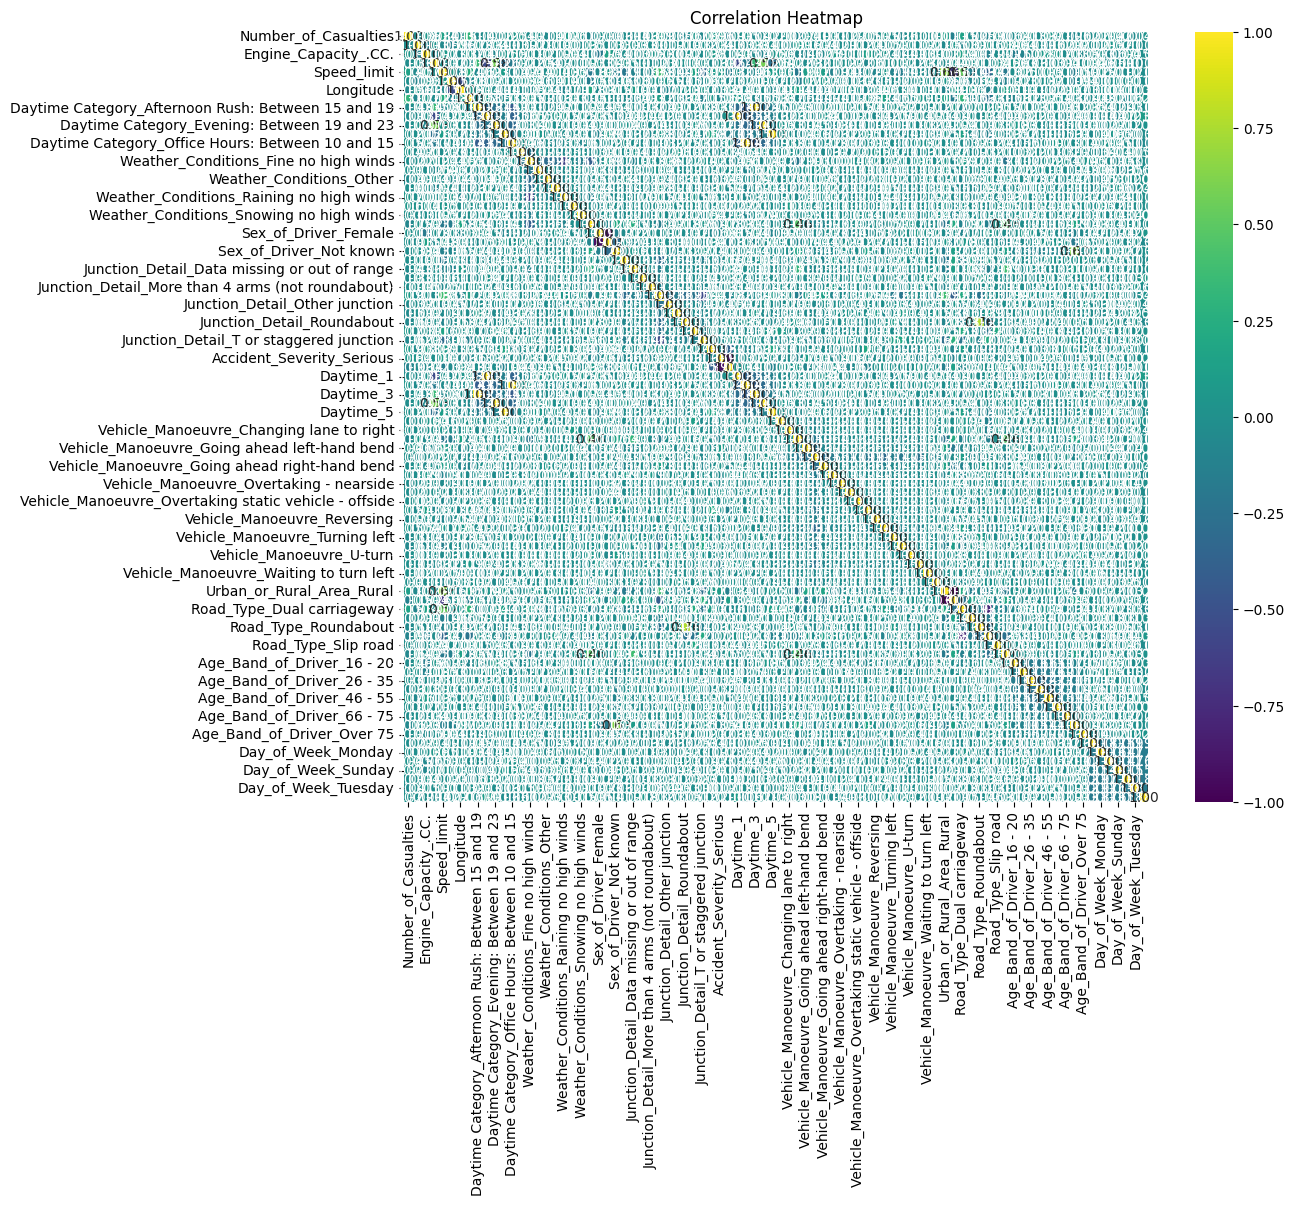

In [38]:

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

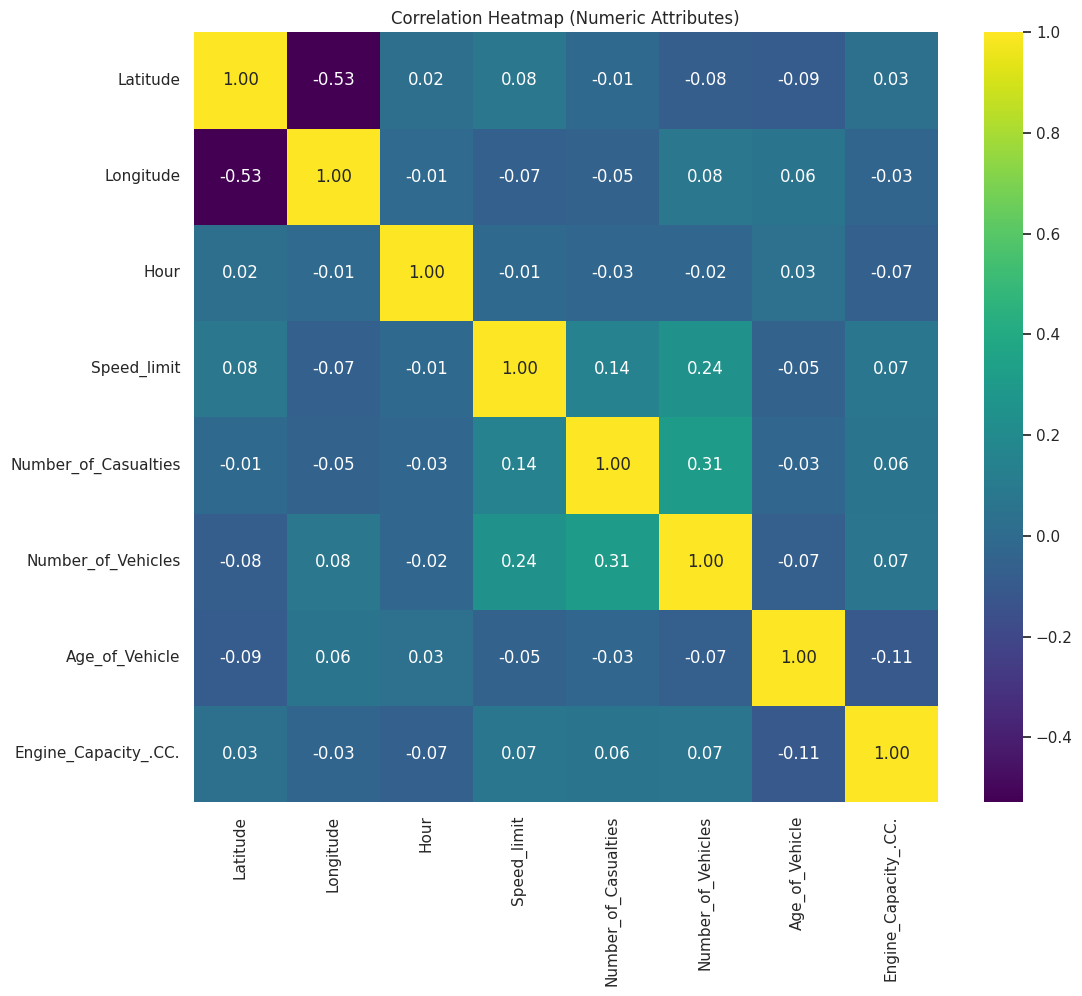

In [62]:
#Heatmap with only numeric columns
# Select only the numeric columns from your DataFrame 'df'
numeric_cols = df.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_cols.corr()

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap (Numeric Attributes)')

# Display the plot
plt.show()


#Analyzing accident dataset 

In [40]:
# Descriptive statistics for numerical attributes
numerical_attributes = ['Number_of_Casualties', 'Number_of_Vehicles']
numerical_stats = accidents[numerical_attributes].describe()
print(numerical_stats)

# Frequency counts for categorical attributes
categorical_attributes = ['Accident_Severity','Road_Type', 'Weather_Conditions']
for attribute in categorical_attributes:
    frequency_counts = accidents[attribute].value_counts()
    print('\n' + attribute + ':')
    print(frequency_counts)

       Number_of_Casualties  Number_of_Vehicles
count           5538.000000         5538.000000
mean               1.242506            1.665764
std                0.798829            0.793045
min                1.000000            1.000000
25%                1.000000            1.000000
50%                1.000000            2.000000
75%                1.000000            2.000000
max               27.000000           20.000000

Accident_Severity:
Accident_Severity
Slight     4872
Serious     617
Fatal        49
Name: count, dtype: int64

Road_Type:
Road_Type
Single carriageway    3000
Unknown               1240
Dual carriageway       878
Roundabout             204
One way street         152
Slip road               64
Name: count, dtype: int64

Weather_Conditions:
Weather_Conditions
Fine no high winds              3111
Unknown                         1459
Raining no high winds            557
Other                            164
Raining + high winds             100
Fine + high winds    

Univariate Analysis

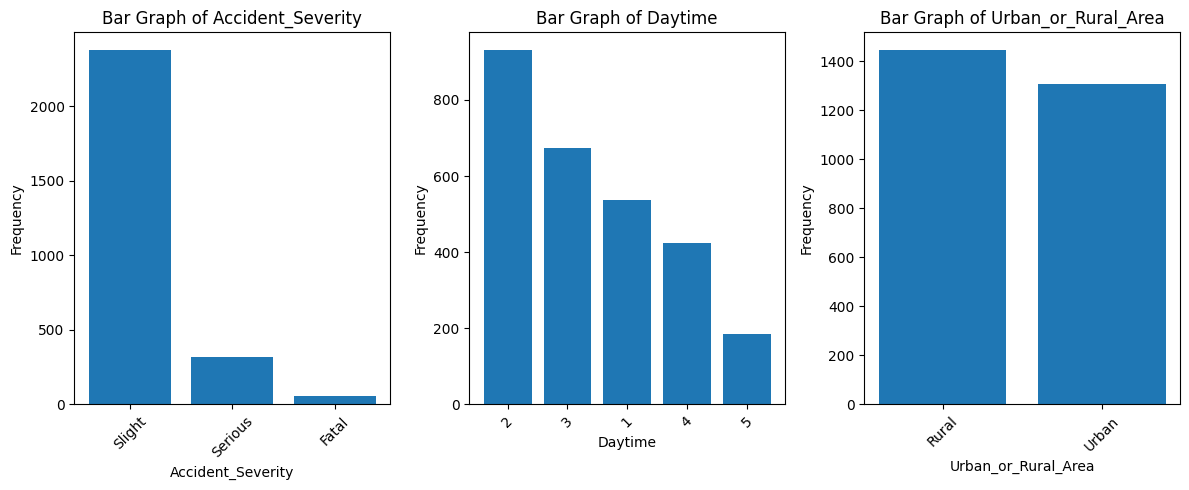

In [41]:
#Module for Bar graphs 

# Specify the attributes for which you want to plot the bar graphs
attributes_to_plot = ['Accident_Severity', 'Daytime', 'Urban_or_Rural_Area']

# Create a new figure and specify the number of rows and columns for the subplots
num_rows = 1
num_cols = len(attributes_to_plot)

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5))

# Loop through the attributes and plot the bar graphs on different subplots
for i, attribute in enumerate(attributes_to_plot):
    # Calculate the frequency counts for the current attribute
    frequency_counts = df[attribute].value_counts()
    
    # Plot the bar graph on the corresponding subplot
    axes[i].bar(frequency_counts.index, frequency_counts)
    
    # Adding labels and title for each subplot
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Bar Graph of {attribute}')

    # Rotate x-axis labels if needed
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

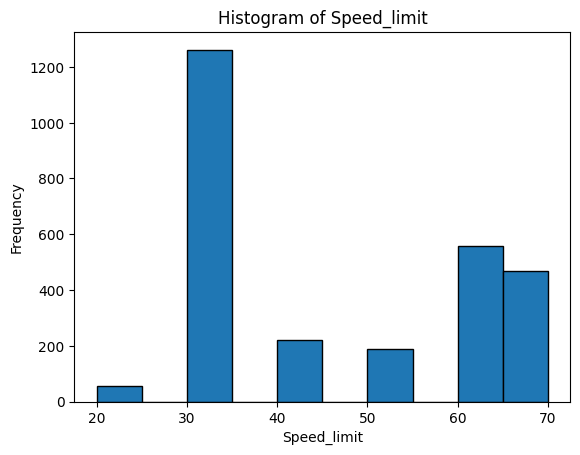

In [42]:
#histogram for Speed_limit

attribute_hist = 'Speed_limit'  # Replace 'Your_Column_Name' with the actual column name

# Plotting the histogram
plt.hist(df[attribute_hist], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel(attribute_hist)
plt.ylabel('Frequency')
plt.title(f'Histogram of {attribute_hist}')

# Display the plot
plt.show()

Bivariate Analysis:

<Figure size 1000x600 with 0 Axes>

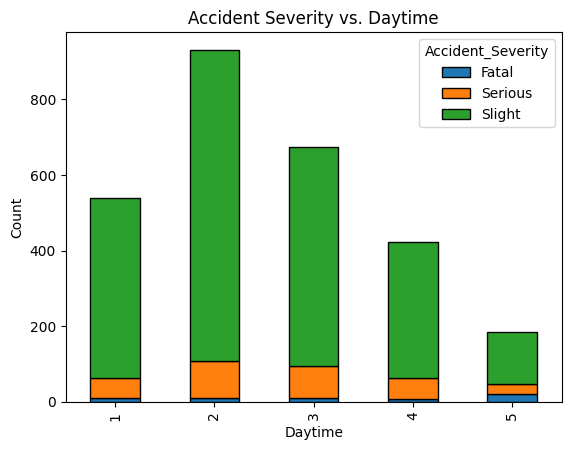

In [43]:
#1.For 'Accident_Severity' vs. 'Daytime':

# Create a pivot table to count the occurrences of each 'Accident_Severity' for each 'Daytime'
pivot_table = pd.pivot_table(df, index='Daytime', columns='Accident_Severity', aggfunc='size', fill_value=0)

# Plot the stacked bar chart with a larger figure size
plt.figure(figsize=(10, 6))

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, edgecolor='black')

# Adding labels and title
plt.xlabel('Daytime')
plt.ylabel('Count')
plt.title('Accident Severity vs. Daytime')

# Display the plot
plt.show()


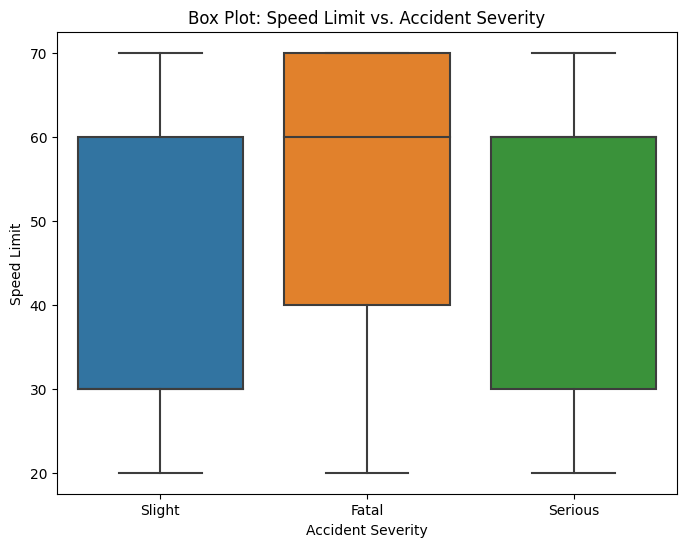

In [44]:
#2.For 'Speed_limit' vs. 'Accident_Severity':

# Create a box plot to compare 'Speed_limit' for different 'Accident_Severity' levels
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.boxplot(data=df, x='Accident_Severity', y='Speed_limit')

# Adding labels and title
plt.xlabel('Accident Severity')
plt.ylabel('Speed Limit')
plt.title('Box Plot: Speed Limit vs. Accident Severity')

# Display the plot
plt.show()

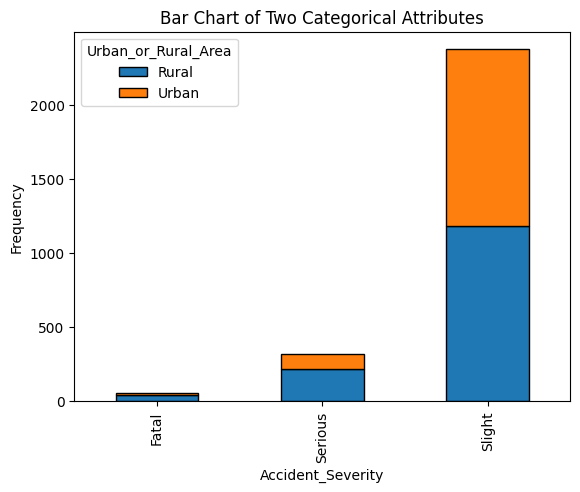

In [45]:
#3. For 'Urban_or_Rural_Area' vs. 'Accident_Severity':

# Specify the two categorical attributes for which you want to create the bar chart
x_attribute = 'Accident_Severity'  # Replace 'Attribute1' with the actual name of the first attribute
y_attribute = 'Urban_or_Rural_Area'  # Replace 'Attribute2' with the actual name of the second attribute

# Calculate the frequency counts for each combination of the two attributes
cross_tab = pd.crosstab(df[x_attribute], df[y_attribute])

# Plotting the bar chart
cross_tab.plot(kind='bar', stacked=True, edgecolor='black')

# Adding labels and title
plt.xlabel(x_attribute)
plt.ylabel('Frequency')
plt.title('Bar Chart of Two Categorical Attributes')

# Display the plot
plt.show()


Numerical Attributes Analysis:

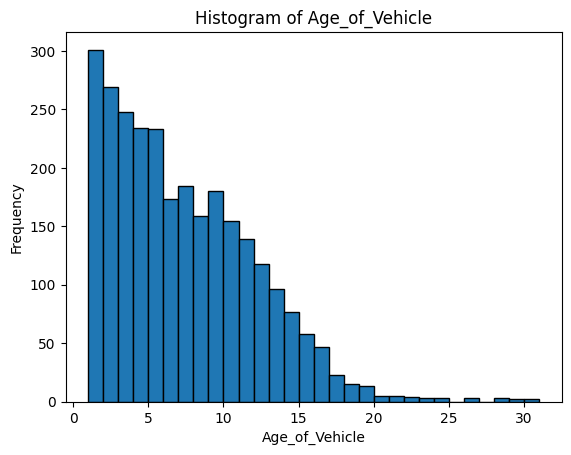

In [46]:
#1. For 'Age_of_Vehicle': Plot a histogram to understand the distribution of the age of vehicles involved in accidents.

attribute_hist = 'Age_of_Vehicle'  # Replace 'Your_Column_Name' with the actual column name

# Plotting the histogram
plt.hist(df[attribute_hist], bins= 30, edgecolor='black')

# Adding labels and title
plt.xlabel(attribute_hist)
plt.ylabel('Frequency')
plt.title(f'Histogram of {attribute_hist}')

# Display the plot
plt.show()

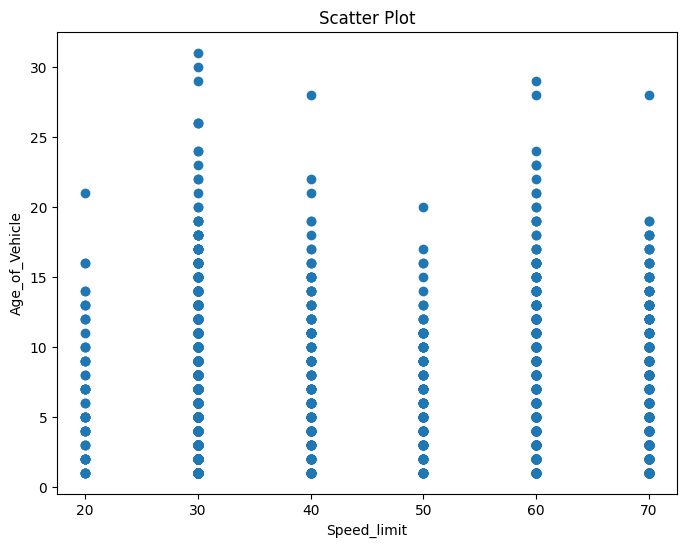

In [47]:
#2.For 'Speed_limit' vs. 'Age_of_Vehicle': Create a scatter plot to visualize any potential relationship between the speed limit and the age of vehicles in accidents.
# Specify the two numerical attributes for which you want to create the scatter plot
x_attribute = 'Speed_limit'  # Replace 'Attribute1' with the actual name of the first numerical attribute
y_attribute = 'Age_of_Vehicle'  # Replace 'Attribute2' with the actual name of the second numerical attribute

plt.figure(figsize=(8, 6))

# Plotting the scatter plot
plt.scatter(df[x_attribute], df[y_attribute])

# Adding labels and title
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title('Scatter Plot')

# Display the plot
plt.show()

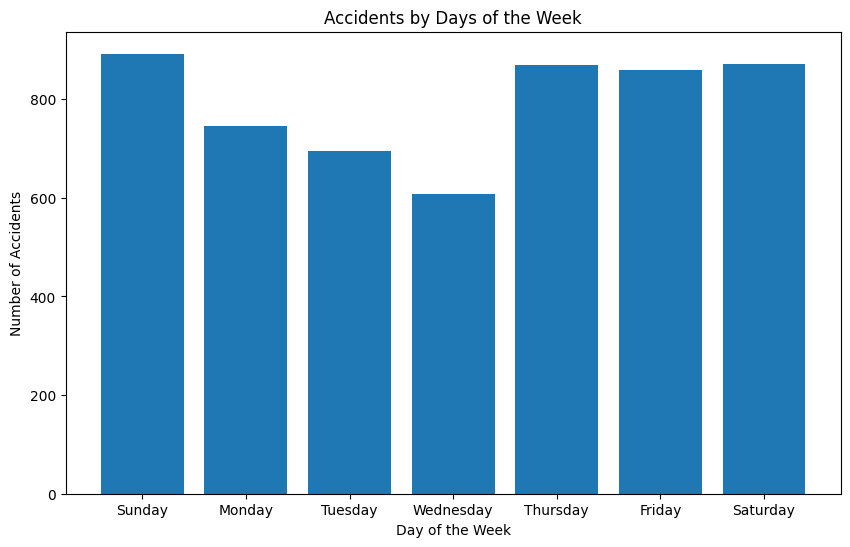

In [48]:
#1. Accident by days

# Group the data by 'Day_of_Week' and count the number of accidents for each day
accidents_by_day = accidents['Accident_Index'].groupby(accidents['Day_of_Week']).count()

# Specify the order of the days of the week for plotting
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


# Plotting the bar chart
plt.figure(figsize=(10,6))

plt.bar(day_order, accidents_by_day)

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Days of the Week')

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

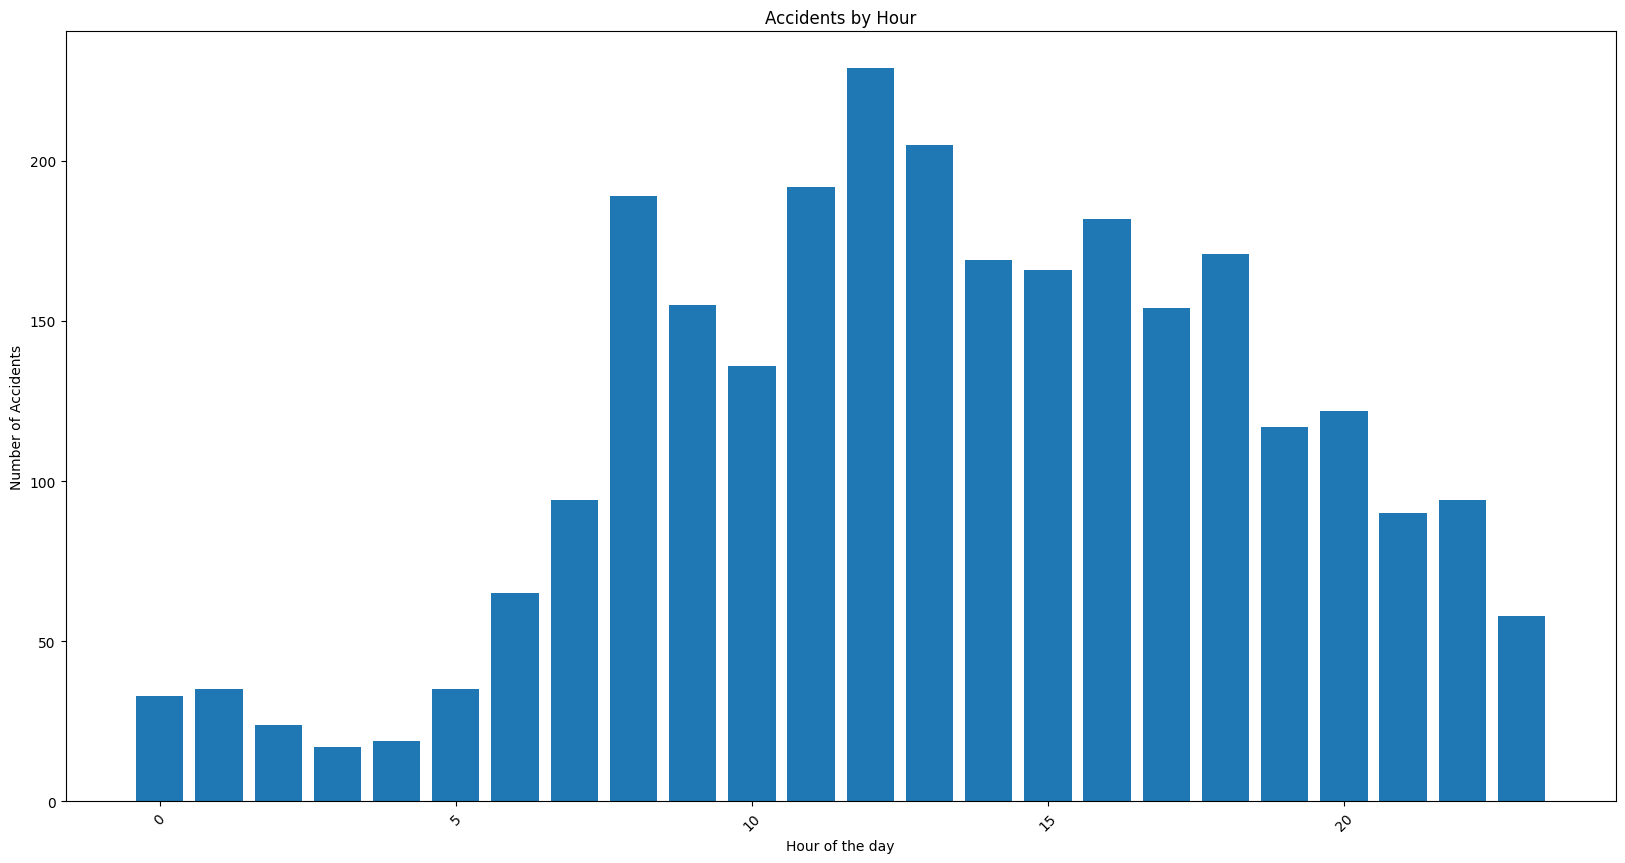

In [49]:
#2. Accidents by hour and daytime. 

# Group the data by 'Day_of_Week' and count the number of accidents for each day
accidents_by_hour = df['Accident_Index'].groupby(df['Hour']).count()

# Plotting the bar chart
plt.figure(figsize=(10,6))

# Plotting the bar chart
plt.figure(figsize=(20,10))                 
plt.bar(accidents_by_hour.index, accidents_by_hour)

# Adding labels and title
plt.xlabel('Hour of the day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour')

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

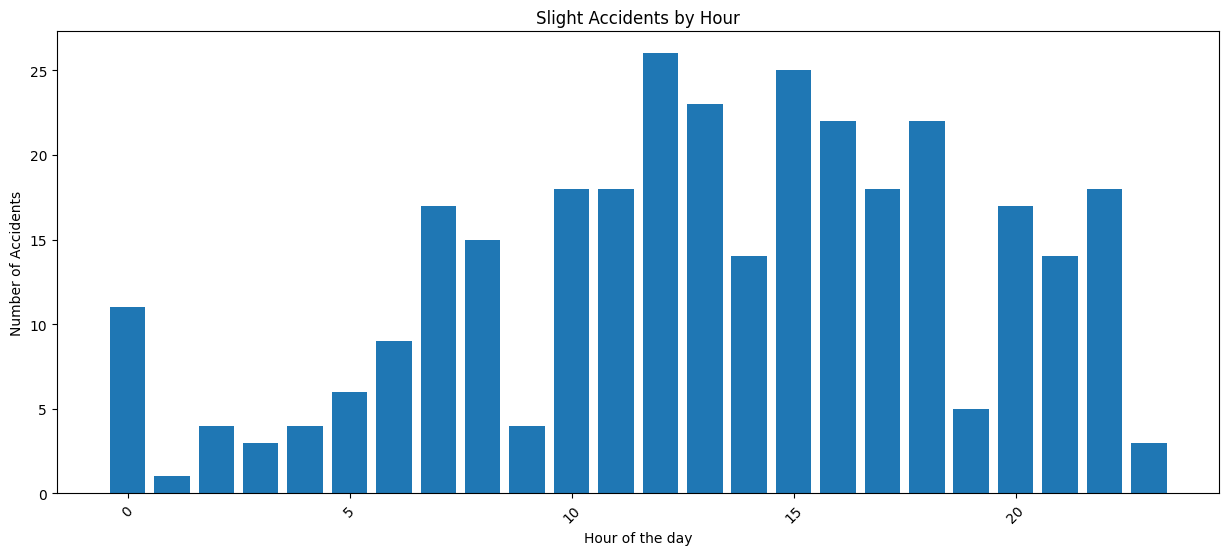

In [50]:
#3. Serious accidents by hour 

# Filter the data to include only serious accidents (assuming 'Accident_Severity' contains the severity level)
serious_accidents = df[df['Accident_Severity'] == 'Serious']

# Group the data by 'Hour' and count the number of serious accidents for each time period
serious_accidents_by_time = serious_accidents['Accident_Index'].groupby(serious_accidents['Hour']).count()

# Plotting the bar chart
plt.figure(figsize=(15,6))

# Plotting the bar chart
plt.bar(serious_accidents_by_time.index, serious_accidents_by_time)


# Adding labels and title
plt.xlabel('Hour of the day')
plt.ylabel('Number of Accidents')
plt.title('Slight Accidents by Hour')

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

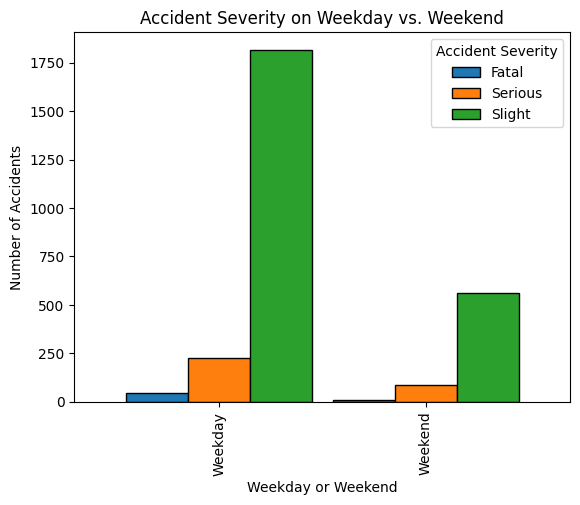

In [51]:
# Create a new column 'Weekday_Or_Weekend' to classify each day as 'Weekday' or 'Weekend'
df['Weekday_Or_Weekend'] = df['Day_of_Week'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

# Group the data by 'Weekday_Or_Weekend' and 'Accident_Severity', and count the number of accidents for each combination
accidents_by_severity = df.groupby(['Weekday_Or_Weekend', 'Accident_Severity'])['Accident_Index'].count().unstack()

# Reorder the columns for consistent ordering in the bar chart
severity_order = ['Fatal', 'Serious', 'Slight']
accidents_by_severity = accidents_by_severity[severity_order]

# Plotting the bar chart
plt.figure(figsize=(10,6))

# Plotting the bar chart
accidents_by_severity.plot(kind='bar', edgecolor='black', width=0.9)

# Adding labels and title
plt.xlabel('Weekday or Weekend')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity on Weekday vs. Weekend')

# Display the plot
plt.legend(title='Accident Severity', loc='upper right')
plt.show()


<Figure size 1200x600 with 0 Axes>

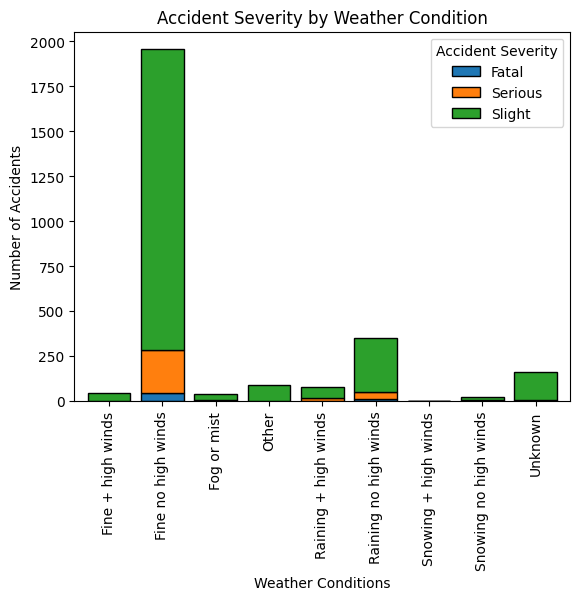

In [52]:
#Accident Severity by Weather Condition

# Group the data by 'Weather_Conditions' and 'Accident_Severity', and count the number of accidents for each combination
accidents_by_weather_severity = df.groupby(['Weather_Conditions', 'Accident_Severity'])['Accident_Index'].count().unstack()

# Reorder the columns for consistent ordering in the stacked bar chart
severity_order = ['Fatal', 'Serious', 'Slight']
accidents_by_weather_severity = accidents_by_weather_severity[severity_order]

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 6))  # Adjust the width and height according to your preference

# Plotting the stacked bar chart
accidents_by_weather_severity.plot(kind='bar', stacked=True, edgecolor='black', width=0.8)

# Adding labels and title
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Weather Condition')

# Display the plot
plt.legend(title='Accident Severity', loc='upper right')
plt.show()


<Figure size 1200x600 with 0 Axes>

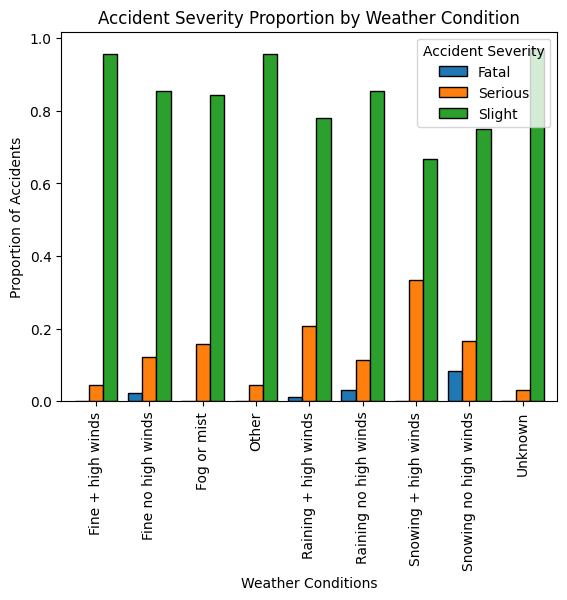

In [53]:
#Accident Severity Proportion by Weather COndition

# Group the data by 'Weather_Conditions' and 'Accident_Severity', and count the number of accidents for each combination
accidents_by_weather_severity = df.groupby(['Weather_Conditions', 'Accident_Severity'])['Accident_Index'].count().unstack()

# Calculate the proportion of each accident severity category within each weather condition
accidents_by_weather_severity_proportion = accidents_by_weather_severity.div(accidents_by_weather_severity.sum(axis=1), axis=0)

# Reorder the columns for consistent ordering in the grouped bar chart
severity_order = ['Fatal', 'Serious', 'Slight']
accidents_by_weather_severity_proportion = accidents_by_weather_severity_proportion[severity_order]

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 6))  # Adjust the width and height according to your preference

# Plotting the grouped bar chart
accidents_by_weather_severity_proportion.plot(kind='bar', edgecolor='black', width=0.8)

# Adding labels and title
plt.xlabel('Weather Conditions')
plt.ylabel('Proportion of Accidents')
plt.title('Accident Severity Proportion by Weather Condition')

# Display the plot
plt.legend(title='Accident Severity', loc='upper right')
plt.show()


<Figure size 800x600 with 0 Axes>

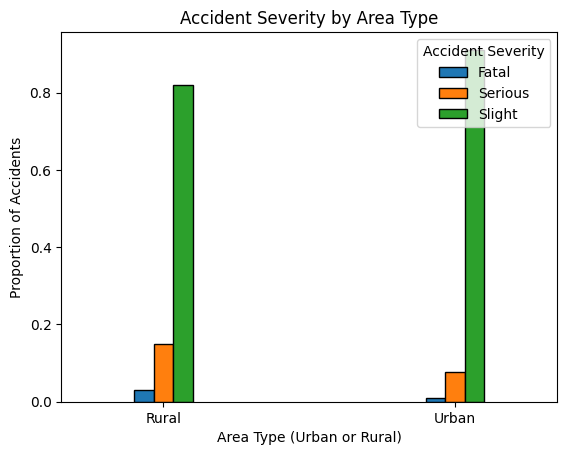

In [54]:
#Accident Severity by Area Type

# Group the data by 'Urban_or_Rural_Area' and 'Accident_Severity', and count the number of accidents for each combination
accidents_by_area_severity = df.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Accident_Index'].count().unstack()

# Calculate the proportion of each accident severity category within each area type
accidents_by_area_severity_proportion = accidents_by_area_severity.div(accidents_by_area_severity.sum(axis=1), axis=0)

# Reorder the columns for consistent ordering in the grouped bar chart
severity_order = ['Fatal', 'Serious', 'Slight']
accidents_by_area_severity_proportion = accidents_by_area_severity_proportion[severity_order]

# Set the figure size (width, height) in inches
plt.figure(figsize=(8, 6))  # Adjust the width and height according to your preference

# Plotting the grouped bar chart
accidents_by_area_severity_proportion.plot(kind='bar', edgecolor='black', width=0.2)

# Adding labels and title
plt.xlabel('Area Type (Urban or Rural)')
plt.ylabel('Proportion of Accidents')
plt.title('Accident Severity by Area Type')

# Display the plot
plt.legend(title='Accident Severity', loc='upper right')
plt.xticks(rotation=0)  # Reset x-axis labels rotation to 0 degrees for better readability
plt.show()


<Figure size 1200x600 with 0 Axes>

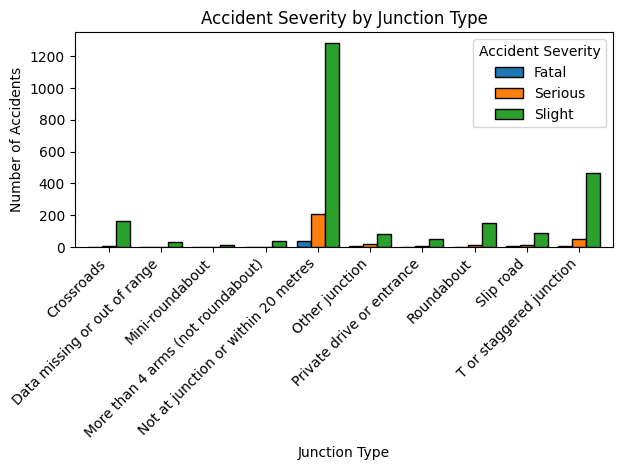

In [55]:
# Accident Severity by Junction Type 


# Group the data by 'Junction_Type' and 'Accident_Severity', and count the number of accidents for each combination
accidents_by_junction_severity = df.groupby(['Junction_Detail', 'Accident_Severity'])['Accident_Index'].count().unstack()

# Reorder the columns for consistent ordering in the grouped bar chart
severity_order = ['Fatal', 'Serious', 'Slight']
accidents_by_junction_severity = accidents_by_junction_severity[severity_order]

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 6))  # Adjust the width and height according to your preference

# Plotting the grouped bar chart
accidents_by_junction_severity.plot(kind='bar', edgecolor='black', width=0.8)

# Adding labels and title
plt.xlabel('Junction Type')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Junction Type')

# Display the plot
plt.legend(title='Accident Severity', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


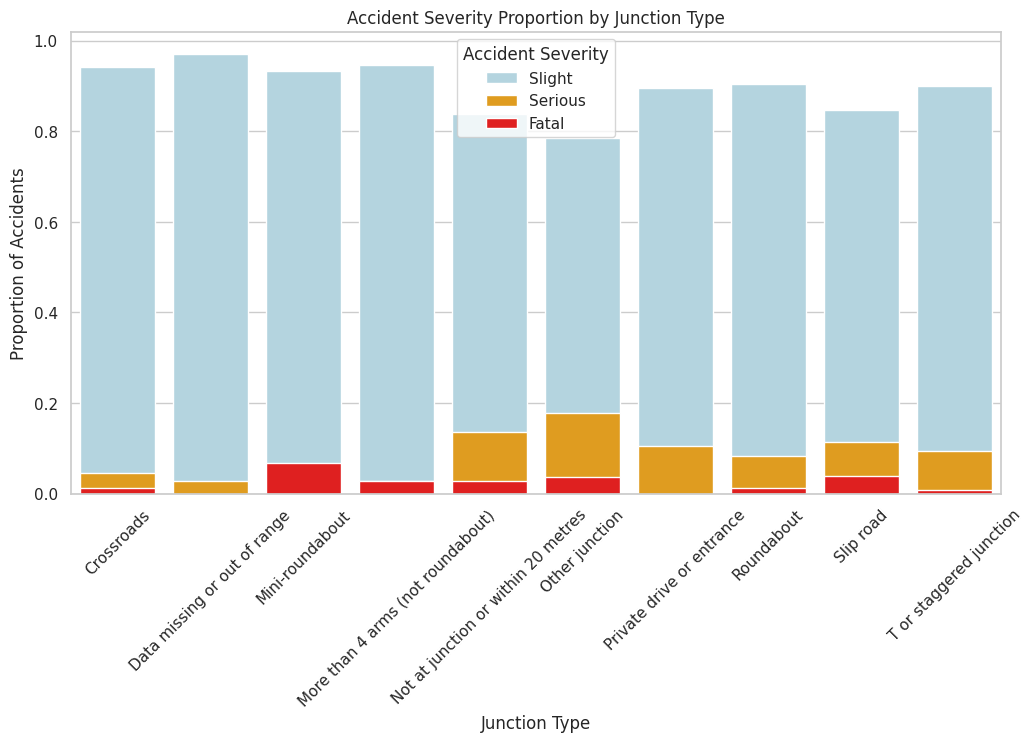

In [56]:
#Accident Severity Proportion by Junction Type
proportions = df.groupby(['Junction_Detail', 'Accident_Severity']).size().unstack().div(df.groupby('Junction_Detail').size(), axis=0)
# Set the style of the plot
sns.set(style="whitegrid")

# Create the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
ax = sns.barplot(x=proportions.index, y="Slight", data=proportions, color="lightblue", label="Slight")
ax = sns.barplot(x=proportions.index, y="Serious", data=proportions, color="orange", label="Serious")
ax = sns.barplot(x=proportions.index, y="Fatal", data=proportions, color="red", label="Fatal")

# Add labels and title
plt.xlabel("Junction Type")
plt.ylabel("Proportion of Accidents")
plt.title("Accident Severity Proportion by Junction Type")

# Add legend
ax.legend(title="Accident Severity")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Figure size 1800x1800 with 0 Axes>

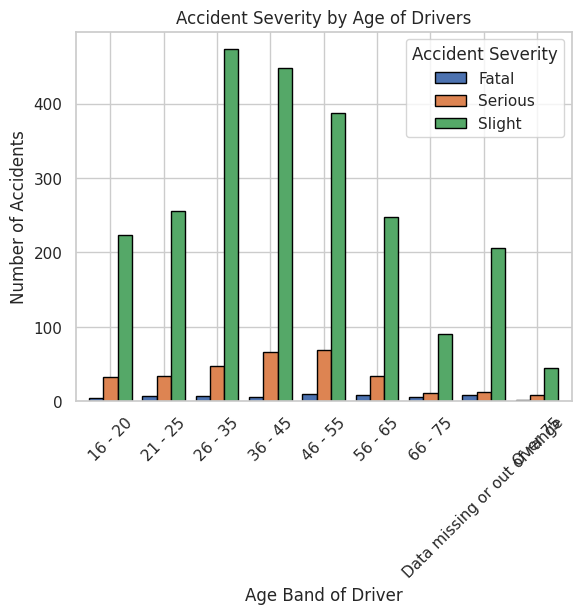

In [57]:
#Driver's age


# Group the data by 'Age_Band_of_Driver' and 'Accident_Severity', and count the number of accidents for each combination
accidents_by_age_severity = df.groupby(['Age_Band_of_Driver', 'Accident_Severity'])['Accident_Index'].count().unstack()

# Reorder the columns for consistent ordering in the bar chart
severity_order = ['Fatal', 'Serious', 'Slight']
accidents_by_age_severity = accidents_by_age_severity[severity_order]

# Set the figure size (width, height) in inches
plt.figure(figsize=(18, 18))  # Adjust the width and height according to your preference

# Plotting the bar chart
accidents_by_age_severity.plot(kind='bar', edgecolor='black', width=0.8)

# Adding labels and title
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Age of Drivers')

# Display the plot
plt.legend(title='Accident Severity', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

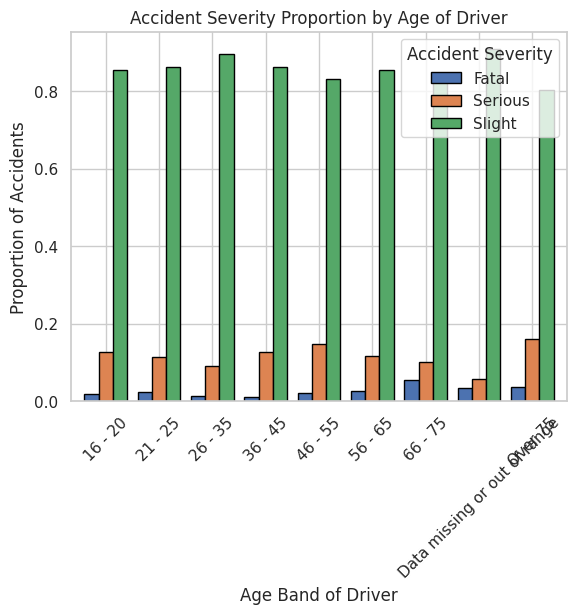

In [58]:
# Age proportion

# Group the data by 'Age_Band_of_Driver' and 'Accident_Severity', and count the number of accidents for each combination
accidents_by_age_severity = df.groupby(['Age_Band_of_Driver', 'Accident_Severity'])['Accident_Index'].count().unstack()

# Calculate the proportion of each accident severity category within each age group
accidents_by_age_severity_proportion = accidents_by_age_severity.div(accidents_by_age_severity.sum(axis=1), axis=0)

# Reorder the columns for consistent ordering in the grouped bar chart
severity_order = ['Fatal', 'Serious', 'Slight']
accidents_by_age_severity_proportion = accidents_by_age_severity_proportion[severity_order]

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 6))

# Plotting the grouped bar chart
accidents_by_age_severity_proportion.plot(kind='bar', edgecolor='black', width=0.8)

# Adding labels and title
plt.xlabel('Age Band of Driver')
plt.ylabel('Proportion of Accidents')
plt.title('Accident Severity Proportion by Age of Driver')

# Display the plot
plt.legend(title='Accident Severity', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Show the plot
plt.show()


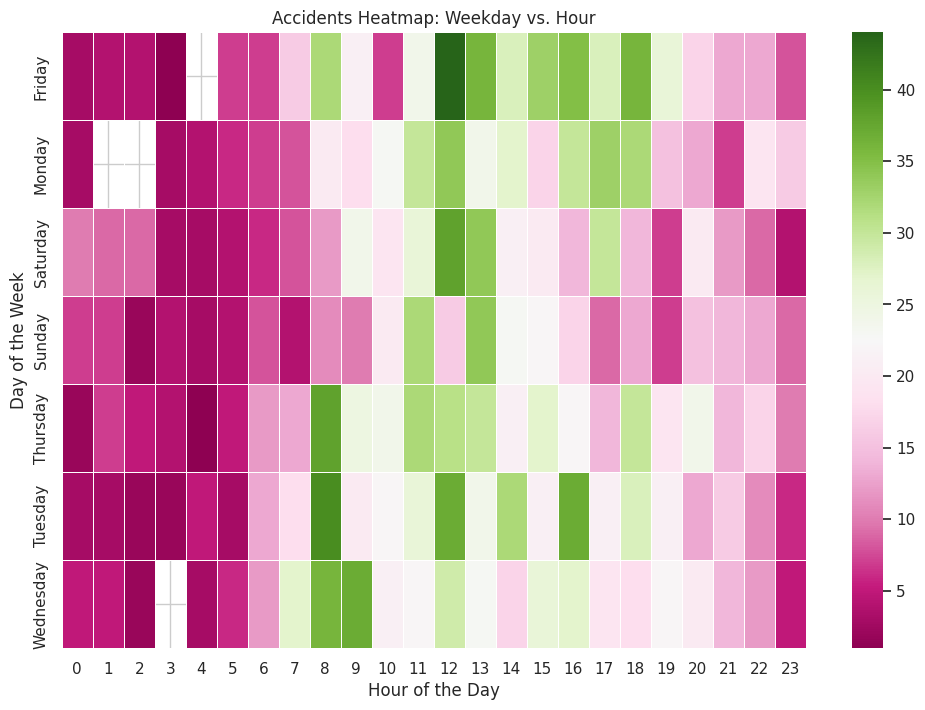

In [59]:
# Heatmap 
# Group the data by 'Day_of_Week' and 'Hour_of_Day', and count the number of accidents for each combination
accidents_by_weekday_hour = df.groupby(['Day_of_Week', 'Hour'])['Accident_Index'].count().unstack()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(accidents_by_weekday_hour, cmap="PiYG", fmt="d", linewidths=.5)

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Accidents Heatmap: Weekday vs. Hour')

# Show the heatmap
plt.show()


In [60]:
# Define the number of random samples you want
n_samples = 1000  # Adjust the number of samples as needed

# Randomly subset the DataFrame
random_subset = df.sample(n=n_samples, random_state=42)

In [63]:
import pandas as pd
import folium

# Assuming you have a DataFrame called 'random_subset'
# Ensure that it contains the necessary columns, including 'Latitude' and 'Longitude'.

# Data processing: Calculate values to display on the map
# For example, you can calculate the total number of accidents at each location
location_data = random_subset.groupby(['Latitude', 'Longitude']).size().reset_index(name='Accident_Count')

# Create a map centered on a specific location (e.g., the UK)
m = folium.Map(location=[53.483959, -2.244644], zoom_start=6)

# Iterate through the DataFrame to add markers for each accident
for index, row in location_data.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    
    # Create a marker for each accident
    marker = folium.Marker(location=[lat, lon], popup=f"Accident Count: {row['Accident_Count']}")
    
    # Add the marker to the map
    marker.add_to(m)

# Display the map
m.save('accidents_map.html')  # Save the map to an HTML file



In [64]:


# Assuming you have a DataFrame called 'random_subset'
# Ensure that it contains the necessary columns, including 'Latitude', 'Longitude', and 'Accident_Severity'.

# Create a map centered on a specific location (e.g., the UK)
m = folium.Map(location=[53.483959, -2.244644], zoom_start=6)

# Define marker icons for each severity level
severity_icons = {
    'Fatal': 'red',      # Use a red marker for Fatal accidents
    'Serious': 'orange', # Use an orange marker for Serious accidents
    'Slight': 'green'   # Use a green marker for Slight accidents
}

# Iterate through the DataFrame to add markers for each accident
for index, row in random_subset.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    severity = row['Accident_Severity']
    
    # Create a marker for each accident with a custom icon based on severity
    marker = folium.Marker(location=[lat, lon], icon=folium.Icon(color=severity_icons.get(severity, 'blue')))
    
    # Add a popup to the marker displaying the severity
    popup_content = f"Accident Severity: {severity}"
    marker.add_child(folium.Popup(popup_content))
    
    # Add the marker to the map
    marker.add_to(m)

# Display the map
m.save('new_accidents_map.html')  # Save the map to an HTML file


Overall Analysis:

Numerical Attributes
We started by conducting a descriptive analysis of the numerical attributes:

Number of Casualties: The mean number of casualties per accident is approximately 1.24, with a maximum of 27 casualties in a single accident.
Number of Vehicles: The mean number of vehicles involved in an accident is approximately 1.67, with a maximum of 20 vehicles.


Categorical Attributes
We also analyzed categorical attributes, including "Accident Severity," "Road Type," and "Weather Conditions." Here are some key insights:

Accident Severity: Most accidents in the dataset are categorized as "Slight" (approximately 87.9%), followed by "Serious" (approximately 11.1%) and "Fatal" (approximately 0.88%).
Road Type: The majority of accidents occur on "Single carriageways" (approximately 54.2%), followed by "Dual carriageways" (approximately 15.9%) and "Roundabouts" (approximately 3.7%).
Weather Conditions: "Fine no high winds" is the most common weather condition during accidents (approximately 56.2%), followed by "Unknown" conditions (approximately 26.4%) and "Raining no high winds" (approximately 10.1%).


Correlation Analysis
We conducted correlation analysis to identify relationships between numeric attributes. Key findings from the correlation analysis include:

A moderate positive correlation between the number of casualties and the number of vehicles involved in accidents (correlation coefficient ≈ 0.31).
Weak correlations between age-related vehicle attributes (e.g., "Age of Vehicle" and "Age Band of Driver") and other attributes.
Time Analysis
We analyzed accidents based on the time of day, categorizing them into five groups: "Early Morning," "Office Hours," "Afternoon Rush," "Evening," and "Night." The analysis revealed that most accidents occur during "Office Hours" (between 10 and 15), followed by the "Afternoon Rush" (between 15 and 19).

Conclusion:
This EDA provided valuable insights into road traffic accidents and their severity. Key takeaways include the predominant occurrence of "Slight" accidents, the influence of factors like road type and weather conditions, and the importance of time-related analysis. These findings can serve as a foundation for further in-depth analysis and the development of safety measures to reduce accident severity on the roads.

Future Directions:
Further analysis of the relationship between specific attributes and accident severity.
Advanced predictive modeling to identify factors contributing to severe accidents.
Geospatial analysis to identify accident hotspots for targeted interventions.
Temporal analysis to detect trends and seasonality in accidents.
This EDA lays the groundwork for more comprehensive research on road safety and accident prevention.